## Bibliotecas necessárias

In [22]:
import numpy as np
import pandas as pd
import geopandas as gpd
from sqlalchemy import create_engine
from geoalchemy2 import Geometry
import sqlite3

Used [DownGit](https://downgit.github.io/#/home) to download the .json file from [Telmo's repository](https://github.com/tbrugz/geodata-br/blob/master/geojson/geojs-33-mun.json)

## Lendo a primeira base

A coluna description é igual à coluna name, então vamos retirá-la

In [23]:
zipfile = "geojs-33-mun.json.zip"
rio_municipios = gpd.read_file(zipfile)
rio_municipios = rio_municipios.drop(columns = 'description')

print(type(rio_municipios))

rio_municipios.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,id,name,geometry
0,3300100,Angra dos Reis,"POLYGON ((-44.19557 -23.09831, -44.19445 -23.1..."
1,3300159,Aperibé,"POLYGON ((-42.11517 -21.60398, -42.11585 -21.6..."
2,3300209,Araruama,"POLYGON ((-42.18220 -22.55217, -42.13226 -22.6..."
3,3300225,Areal,"POLYGON ((-43.05873 -22.18937, -43.04773 -22.2..."
4,3300233,Armação dos Búzios,"POLYGON ((-41.93436 -22.76580, -41.91900 -22.7..."


## Lendo a segunda base


In [24]:
csvfile = "municipio.csv"
municipio = gpd.read_file(csvfile)
municipio.head()

,ano,sigla_uf,id_municipio,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao,geometry
0,2005,AC,1200013,estadual,fundamental,finais (6-9),90,0.89959502,223.3,209.69,3.88221,3.5,,None
1,2005,AC,1200013,estadual,fundamental,iniciais (1-5),80.4,0.76059997,167.8,154.39,3.972965,3,,None
2,2005,AC,1200013,municipal,fundamental,finais (6-9),,,,,,,,None
3,2005,AC,1200013,municipal,fundamental,iniciais (1-5),66.3,0.68155998,169.8,163,4.1680932,2.8,,None
4,2005,AC,1200013,publica,fundamental,finais (6-9),89,0.89366102,223.3,209.69,3.8821671,3.5,,None


In [25]:
dados_rio = municipio[municipio['sigla_uf'] == "RJ"]
dados_rio = dados_rio.drop(columns = ['projecao','geometry'])
dados_rio.tail()

,ano,sigla_uf,id_municipio,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb
280698,2021,RJ,3306305,municipal,fundamental,iniciais (1-5),,,,,,
280699,2021,RJ,3306305,municipal,medio,todos (1-4),,,,,,
280700,2021,RJ,3306305,publica,fundamental,finais (6-9),,,,,,
280701,2021,RJ,3306305,publica,fundamental,iniciais (1-5),,,,,,
280702,2021,RJ,3306305,publica,medio,todos (1-4),,,,,,


In [26]:
dados_rio['taxa_aprovacao'].replace('', np.nan, inplace=True)
dados_rio.dropna(subset=['taxa_aprovacao'], inplace=True)
dados_rio.index.names = ["id_dados"]
dados_rio

,ano,sigla_uf,id_municipio,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb
id_dados,,,,,,,,,,,,
18479,2005,RJ,3300100,estadual,fundamental,finais (6-9),69.6,0.69632202,241.39,230.69,4.5339708,3.2
18480,2005,RJ,3300100,estadual,fundamental,iniciais (1-5),81.5,0.81477797,179.8,173,4.5396662,3.7
18481,2005,RJ,3300100,municipal,fundamental,finais (6-9),69.2,0.70024502,247.19,236,4.7203331,3.3
18482,2005,RJ,3300100,municipal,fundamental,iniciais (1-5),73.9,0.73932397,189.39,182.19,4.8886571,3.6
18483,2005,RJ,3300100,publica,fundamental,finais (6-9),69.4,0.69687301,242.89,232,4.5811672,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...
240234,2019,RJ,3306305,municipal,fundamental,iniciais (1-5),91.8,0.91792399,242.47,230.5,6.782443,6.2
240235,2019,RJ,3306305,municipal,medio,todos (1-4),86.1,0.86114401,315.45,307.6,5.7250719,4.9
240236,2019,RJ,3306305,publica,fundamental,finais (6-9),88.8,0.888152,272.42,264.8,5.6205001,5


## Colocando em um banco de dados

In [27]:
conn = sqlite3.connect('ideb-database.db')
cur = conn.cursor()

In [28]:
cur.execute('''CREATE TABLE IF NOT EXISTS municipios_rio
             ('id' INT PRIMARY KEY NOT NULL,
             'name' text, 
             'geometry' text)''')
conn.commit()

In [29]:
rio_municipios_pd = pd.DataFrame(rio_municipios)
rio_municipios_pd['geometry'] = rio_municipios_pd['geometry'].astype(str)

In [30]:
rio_municipios_pd.to_sql('municipios_rio', con=conn, if_exists='replace')
conn.commit()

In [31]:
cur.execute("SELECT name FROM municipios_rio")
print(cur.fetchmany(10))

[('Angra dos Reis',), ('Aperibé',), ('Araruama',), ('Areal',), ('Armação dos Búzios',), ('Arraial do Cabo',), ('Barra do Piraí',), ('Barra Mansa',), ('Belford Roxo',), ('Bom Jardim',)]


In [32]:
cur.execute('''CREATE TABLE IF NOT EXISTS dados_municipios_rio
             ('id_dados' INT PRIMARY KEY NOT NULL,
             'ano' INT NOT NULL,
             'sigla_uf' text,
             'id_municipio' INT NOT NULL,
             'rede' TEXT ,
             'ensino' TEXT,
             'anos_escolares' TEXT,
             'taxa_aprovacao' REAL,
             'indicador_rendimento' REAL,
             'nota_saeb_matematica' REAL,
             'nota_saeb_lingua_portuguesa' REAL,
             'nota_saeb_media_padronizada' REAL,
             'ideb' REAL)''')
conn.commit()

In [33]:
dados_rio.to_sql('dados_municipios_rio', con=conn, if_exists='replace')
conn.commit()

In [34]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())

[('municipios_rio',), ('dados_municipios_rio',)]


In [35]:
cur.execute("SELECT id_dados FROM dados_municipios_rio")
print(cur.fetchmany(10))

[(18479,), (18480,), (18481,), (18482,), (18483,), (18484,), (18485,), (18488,), (18489,), (18490,)]


In [36]:
dados = '''SELECT * FROM dados_municipios_rio d LEFT JOIN municipios_rio m ON d.id_municipio=m.id
'''

cur.execute(dados)
df = pd.read_sql_query(dados, conn)
df.head()

,id_dados,ano,sigla_uf,id_municipio,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,index,id,name,geometry
0,18479,2005,RJ,3300100,estadual,fundamental,finais (6-9),69.6,0.69632202,241.39,230.69,4.5339708,3.2,0,3300100,Angra dos Reis,"POLYGON ((-44.1955721491 -23.0983083542, -44.1..."
1,18480,2005,RJ,3300100,estadual,fundamental,iniciais (1-5),81.5,0.81477797,179.8,173,4.5396662,3.7,0,3300100,Angra dos Reis,"POLYGON ((-44.1955721491 -23.0983083542, -44.1..."
2,18481,2005,RJ,3300100,municipal,fundamental,finais (6-9),69.2,0.70024502,247.19,236,4.7203331,3.3,0,3300100,Angra dos Reis,"POLYGON ((-44.1955721491 -23.0983083542, -44.1..."
3,18482,2005,RJ,3300100,municipal,fundamental,iniciais (1-5),73.9,0.73932397,189.39,182.19,4.8886571,3.6,0,3300100,Angra dos Reis,"POLYGON ((-44.1955721491 -23.0983083542, -44.1..."
4,18483,2005,RJ,3300100,publica,fundamental,finais (6-9),69.4,0.69687301,242.89,232,4.5811672,3.2,0,3300100,Angra dos Reis,"POLYGON ((-44.1955721491 -23.0983083542, -44.1..."


In [37]:
df = df.drop(columns = ['id','index'])

In [38]:
df = gpd.GeoDataFrame(df)

In [39]:
df.dtypes

id_dados                        int64
ano                            object
sigla_uf                       object
id_municipio                   object
rede                           object
ensino                         object
anos_escolares                 object
taxa_aprovacao                 object
indicador_rendimento           object
nota_saeb_matematica           object
nota_saeb_lingua_portuguesa    object
nota_saeb_media_padronizada    object
ideb                           object
name                           object
geometry                       object
dtype: object

In [40]:
from shapely import wkt

In [41]:
df['geometry'] = gpd.GeoSeries.from_wkt(df['geometry'])

In [42]:
df.dtypes

id_dados                          int64
ano                              object
sigla_uf                         object
id_municipio                     object
rede                             object
ensino                           object
anos_escolares                   object
taxa_aprovacao                   object
indicador_rendimento             object
nota_saeb_matematica             object
nota_saeb_lingua_portuguesa      object
nota_saeb_media_padronizada      object
ideb                             object
name                             object
geometry                       geometry
dtype: object

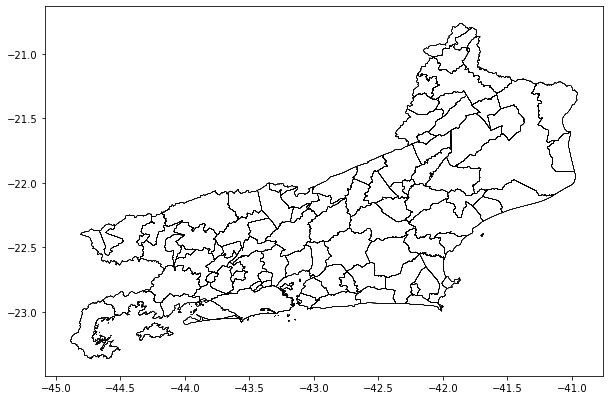

In [46]:
mapario = df.boundary.plot(figsize = (10,10), edgecolor = 'black', linewidth = 0.05)